In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import umap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)


/Users/heatherwang/Documents/Python/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
# Loading data into dataframes
def data_preprocessing(file_name):
    df = pd.read_csv(file_name)
    df.reset_index(drop=True)
    df = df.drop(df.columns[0], axis=1)
    return df

word_embed_train = data_preprocessing('384EMBEDDINGS_TRAIN.csv')
word_embed_test = data_preprocessing('384EMBEDDINGS_TEST.csv')
word_embed_validation = data_preprocessing('384EMBEDDINGS_VALIDATION.csv')

tfidf_train = data_preprocessing('TFIDF_TRAIN.csv')
tfidf_test = data_preprocessing('TFIDF_TEST.csv')
tfidf_validation = data_preprocessing('TFIDF_VALIDATION.csv')

train_data = data_preprocessing('TRAIN.csv')
test_data = data_preprocessing('TEST_NO_LABELS.csv')
validation_data = data_preprocessing('VALIDATION.csv')

In [31]:
X_train_both = pd.concat([word_embed_train, tfidf_train],axis=1)
X_vad_both = pd.concat([word_embed_validation,tfidf_validation], axis=1)
label = validation_data['rating']

In [32]:
# Explorative Data Analysis
# Positive and Negative Words By counts
positive_data = tfidf_train[train_data['rating'] == 1]
positive_data = positive_data.drop('Unnamed: 0', axis=1, errors='ignore')
negative_data = tfidf_train[train_data['rating'] == -1]
negative_data = negative_data.drop('Unamed: 0', axis=1, errors='ignore')

positive_counts = positive_data.sum()
negative_counts = negative_data.sum()
top_positive = positive_counts.sort_values(ascending=False).head(20)
top_negative = negative_counts.sort_values(ascending=False).head(20)

# Positive and Negative Words By correlation
correlations = tfidf_train.corrwith(train_data['rating']).sort_values(ascending=False)
top_positive_corr = correlations.head(10)
top_negative_corr = correlations.tail(10)

# Label Distribution between train and validation set
train_labels = train_data['rating'].value_counts()
vad_labels = validation_data['rating'].value_counts()

rename_labels = {1: 'Positive', -1: 'Negative'}
train_labels = train_labels.rename(index=rename_labels)
vad_labels = vad_labels.rename(index=rename_labels)


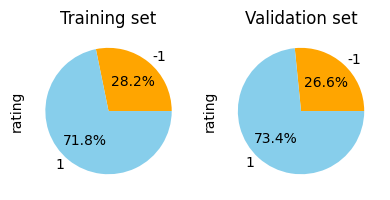

In [11]:
train_rating_counts = train_data['rating'].value_counts().sort_index()
vad_rating_counts = validation_data['rating'].value_counts().sort_index()

colors = ['orange', 'skyblue']
# Visualization
plt.figure(figsize=(4, 3))
# Plot for positive counts
plt.subplot(1,2,1)
train_rating_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Training set')

plt.subplot(1,2,2)
vad_rating_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Validation set')
plt.tight_layout()
plt.show()

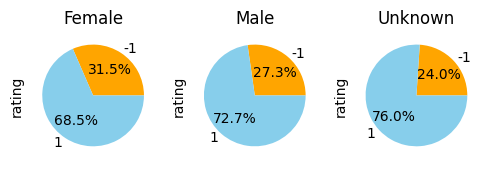

In [4]:
gender_rating = train_data[['dr_id_gender','rating']]
female_rating = gender_rating[gender_rating['dr_id_gender'] == 0]
male_rating = gender_rating[gender_rating['dr_id_gender'] == 1]
unknown_rating = gender_rating[gender_rating['dr_id_gender'] == 2]

female_counts = female_rating['rating'].value_counts().sort_index()
male_counts = male_rating['rating'].value_counts().sort_index()
unknown_counts = unknown_rating['rating'].value_counts().sort_index()

colors = ['orange', 'skyblue']
# Visualization
plt.figure(figsize=(5, 4))
plt.subplot(1, 3, 1)
# Plot for positive counts
female_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Female')


# Plot for positive counts
plt.subplot(1, 3, 2)
male_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Male')


# Plot for positive counts
plt.subplot(1, 3, 3)
unknown_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Unknown')
plt.tight_layout()
plt.show()

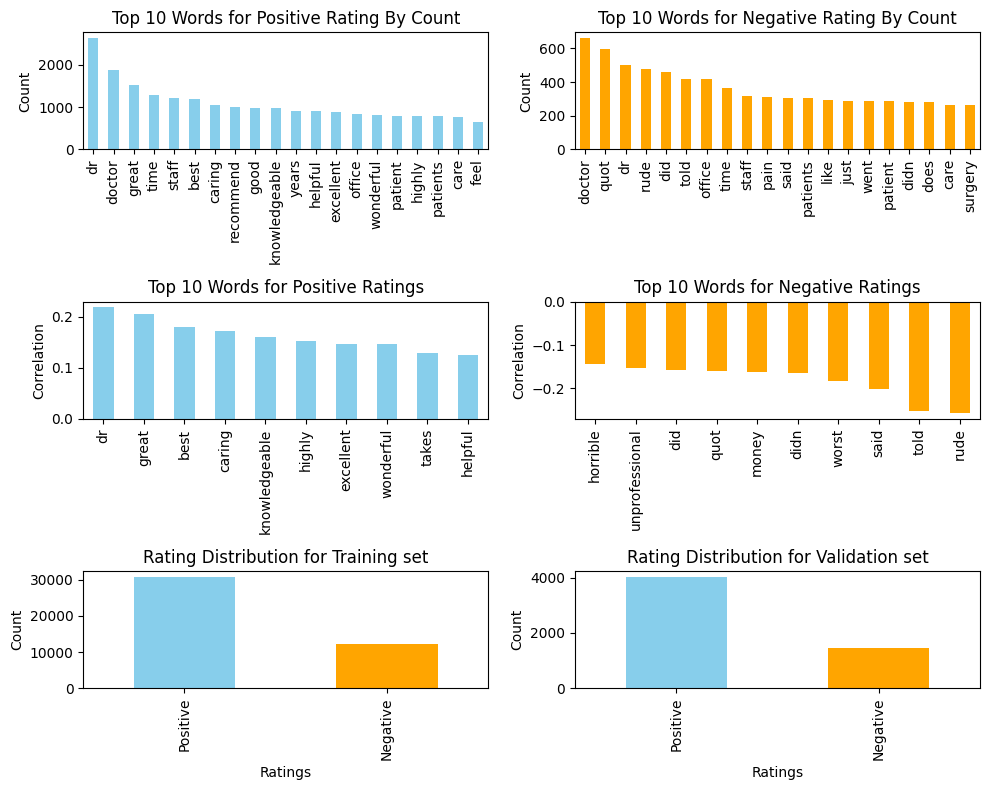

In [33]:
# Visualization
plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
# Plot for positive counts
top_positive.plot(kind='bar', color='skyblue')
plt.title('Top 10 Words for Positive Rating By Count')
plt.ylabel('Count')

# Plot for positive counts
plt.subplot(3, 2, 2)
top_negative.plot(kind='bar', color='orange')
plt.title('Top 10 Words for Negative Rating By Count')
plt.ylabel('Count')


# By correlation
plt.subplot(3, 2, 3)
top_positive_corr.plot(kind='bar', color='skyblue')
plt.title('Top 10 Words for Positive Ratings')
plt.ylabel('Correlation')

# Plot for positive counts
plt.subplot(3, 2, 4)
top_negative_corr.plot(kind='bar', color='orange')
plt.title('Top 10 Words for Negative Ratings')
plt.ylabel('Correlation')

# Label Distribution between train and validation set
plt.subplot(3, 2, 5)
colors = ['skyblue' if bar != 'Negative' else 'orange' for bar in train_labels.index]
train_labels.plot(kind='bar', color=colors)
plt.title('Rating Distribution for Training set')
plt.xlabel('Ratings')
plt.ylabel('Count')

plt.subplot(3, 2, 6)
vad_labels.plot(kind='bar', color=colors)
plt.title('Rating Distribution for Validation set')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [9]:
all_column_names = X_train_both.columns
scaler = StandardScaler()
scaler.fit(X_train_both)
X_train_all_scaled = scaler.transform(X_train_both)
X_vad_all_scaled = scaler.transform(X_vad_both)
X_train_all_scaled = pd.DataFrame(X_train_all_scaled, columns=all_column_names)
X_vad_all_scaled = pd.DataFrame(X_vad_all_scaled, columns=all_column_names)

Value Ranges:
Word Embeddings: [-0.29050294, 0.40621856]
TF-IDF: [0.0, 1.0]


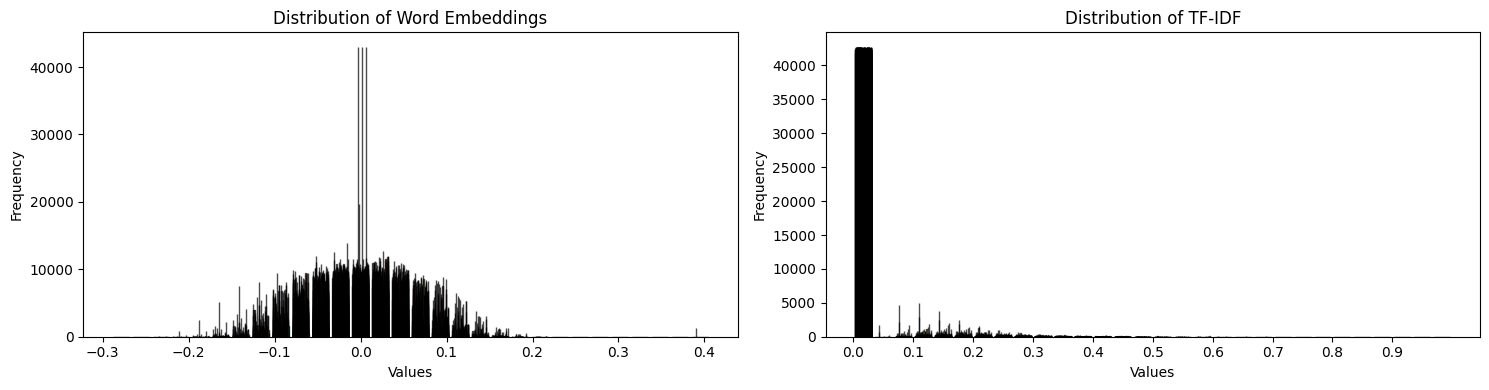

In [46]:
# Feature Value Range
print("Value Ranges:")
embed_min = word_embed_train.min().min()
embed_max = word_embed_train.max().max()
print(f"Word Embeddings: [{embed_min}, {embed_max}]")
tf_min = tfidf_train.min().min().item()
tf_max = tfidf_train.max().max().item()


print(f"TF-IDF: [{tf_min}, {tf_max}]")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))  # 1 row, 2 columns
# Plotting the second histogram on ax2
ax1.hist(word_embed_train.values, bins=30, edgecolor='k', alpha=0.7)
ax1.set_title('Distribution of Word Embeddings')
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
# Plotting the first histogram on ax1
ax2.hist(tfidf_train.values, bins=30, edgecolor='k', alpha=0.7)
ax2.set_title('Distribution of TF-IDF')
ax2.set_xlabel('Values')
plt.xticks(np.arange(tf_min,tf_max, step =0.1))
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### PCA Projection

In [7]:
def reduce_dimensions(feature, num_dimension):
    prefix = "Component"
    col = [f"{prefix} {i+1}" for i in range(num_dimension)]

    pca = PCA(n_components=num_dimension)
    X_pca = pca.fit_transform(feature)   
    pca_df = pd.DataFrame(data=X_pca, columns=col)
    pca_df['rating'] = label


    # Using UMAP to reduce dimensionality
    reducer = umap.UMAP(n_components=num_dimension)
    X_umap = reducer.fit_transform(feature)
    umap_df = pd.DataFrame(data=X_umap, columns=col)
    umap_df['rating'] = label

    # T-SNE to reduce dimensionality
    tsne = TSNE(n_components=num_dimension, random_state=0)
    X_tsne = tsne.fit_transform(feature)
    tsne_df = pd.DataFrame(data=X_tsne, columns=col)
    tsne_df['rating'] = label
    return pca_df, umap_df, tsne_df


_PCA 3D Projection_

In [10]:
pca3_both_df, umap3_both_df, tsne3_both_df = reduce_dimensions(train_both,3)

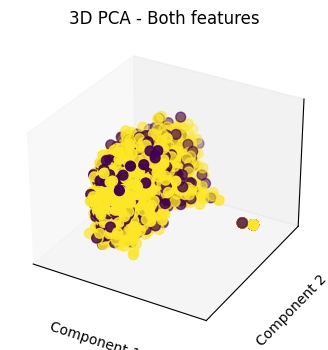

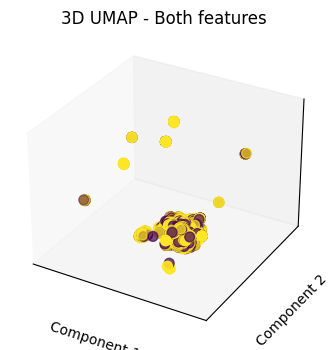

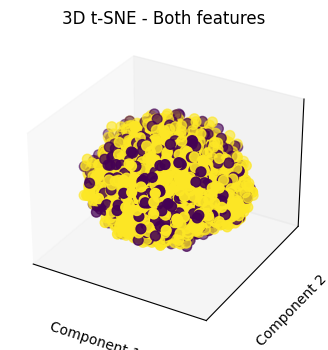

In [24]:
pca3_fig = plt.figure(figsize=(5,4))
pca3_ax = pca3_fig.add_subplot(111, projection='3d')
pca3_scatter = pca3_ax.scatter(pca3_both_df['Component 1'], pca3_both_df['Component 2'], pca3_both_df['Component 3'], 
                     c=pca3_both_df['rating'], cmap='viridis', s=50)

# Add axis labels and title
pca3_ax.set_xticks([])
pca3_ax.set_yticks([])
pca3_ax.set_zticks([])
pca3_ax.set_xlabel('Component 1')
pca3_ax.set_ylabel('Component 2')
pca3_ax.set_zlabel('Component 3')
pca3_ax.set_title('3D PCA - Both features')

umap3_fig = plt.figure(figsize=(5, 4))
umap3_ax = umap3_fig.add_subplot(111, projection='3d')
umap3_scatter = umap3_ax.scatter(umap3_both_df['Component 1'], umap3_both_df['Component 2'], umap3_both_df['Component 3'], 
                     c=umap3_both_df['rating'], cmap='viridis', s=50)

# Add axis labels and title
umap3_ax.set_xticks([])
umap3_ax.set_yticks([])
umap3_ax.set_zticks([])
umap3_ax.set_xlabel('Component 1')
umap3_ax.set_ylabel('Component 2')
umap3_ax.set_zlabel('Component 3')
umap3_ax.set_title('3D UMAP - Both features')

tsne3_fig = plt.figure(figsize=(5, 4))
tsne3_ax = tsne3_fig.add_subplot(111, projection='3d')
tsne3_scatter = tsne3_ax.scatter(tsne3_both_df['Component 1'], tsne3_both_df['Component 2'], tsne3_both_df['Component 3'], 
                     c=tsne3_both_df['rating'], cmap='viridis', s=50)

# Add axis labels and title
tsne3_ax.set_xticks([])
tsne3_ax.set_yticks([])
tsne3_ax.set_zticks([])
tsne3_ax.set_xlabel('Component 1')
tsne3_ax.set_ylabel('Component 2')
tsne3_ax.set_zlabel('Component 3')
tsne3_ax.set_title('3D t-SNE - Both features')

plt.show()

_PCA 2D Projection_

In [27]:
# Apply PCA with n_components=2
pca = PCA(n_components=2)
both_pca = pca.fit_transform(train_both)

# Using UMAP to reduce dimensionality
reducer = umap.UMAP()
both_umap = reducer.fit_transform(train_both)

# T-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0)
both_tsne = tsne.fit_transform(train_both)

In [28]:
pca_both_df = pd.DataFrame(data=both_pca, columns=['Component 1', 'Component 2'])
pca_both_df['rating'] = label

umap_both_df = pd.DataFrame(data=both_umap, columns=['Component 1', 'Component 2'])
umap_both_df['rating'] = label

tsne_both_df = pd.DataFrame(data=both_tsne, columns=['Component 1', 'Component 2'])
tsne_both_df['rating'] = label

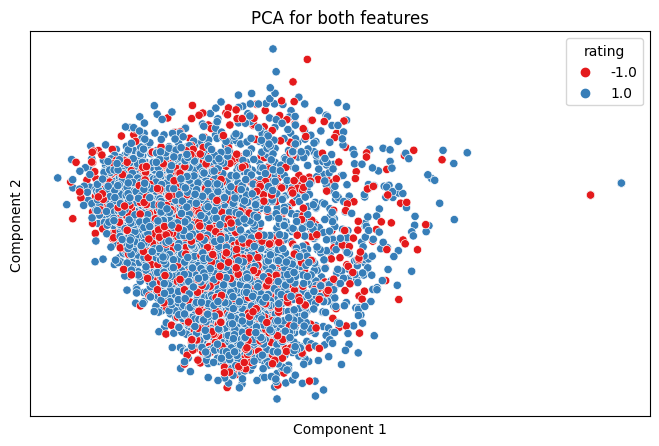

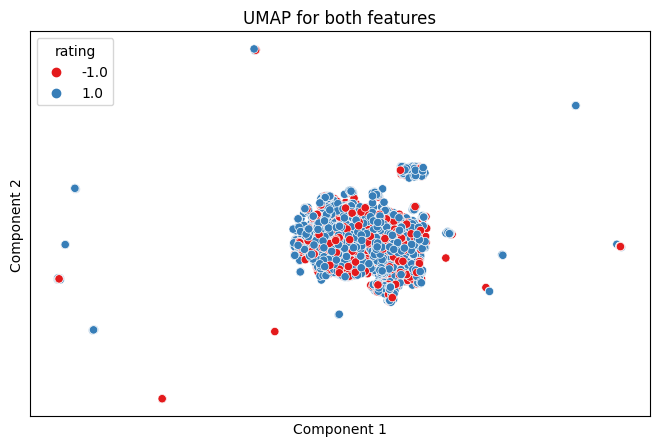

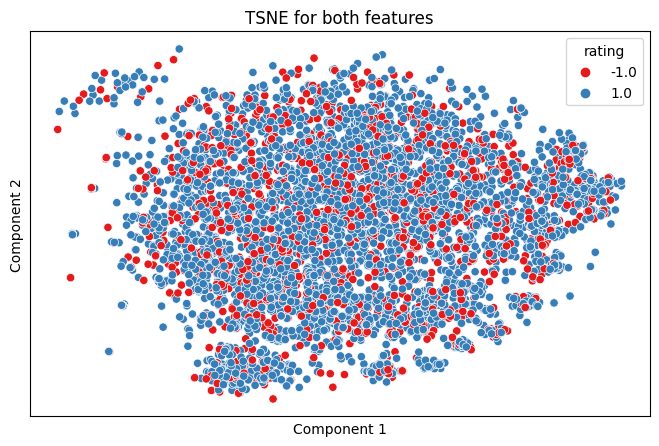

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Component 1', y='Component 2', hue='rating', data=pca_both_df, palette='Set1')
plt.title('PCA for both features')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Component 1', y='Component 2', hue='rating', data=umap_both_df, palette='Set1')
plt.title('UMAP for both features')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Component 1', y='Component 2', hue='rating', data=tsne_both_df, palette='Set1')
plt.title('TSNE for both features')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

_Wrod-Embeddings Projection_

In [20]:
pca3_embed, umap3_embed, tsne3_embed = reduce_dimensions(word_embed_train, 3)

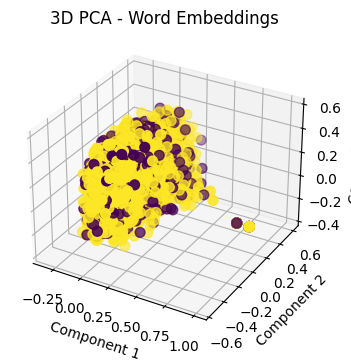

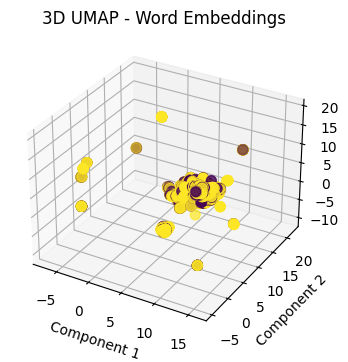

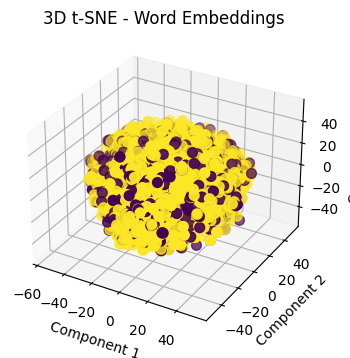

In [23]:
pca3_embed_fig = plt.figure(figsize=(5,4))
pca3_embed_ax = pca3_embed_fig.add_subplot(111, projection='3d')
pca3_embed_scatter = pca3_embed_ax.scatter(pca3_embed['Component 1'], pca3_embed['Component 2'], pca3_embed['Component 3'], 
                     c=pca3_embed['rating'], cmap='viridis', s=50)

# Add axis labels and title
pca3_embed_ax.set_xlabel('Component 1')
pca3_embed_ax.set_ylabel('Component 2')
pca3_embed_ax.set_zlabel('Component 3')
pca3_embed_ax.set_title('3D PCA - Word Embeddings')

umap3_embed_fig = plt.figure(figsize=(5, 4))
umap3_embed_ax = umap3_embed_fig.add_subplot(111, projection='3d')
umap3_embed_scatter = umap3_embed_ax.scatter(umap3_embed['Component 1'], umap3_embed['Component 2'], umap3_embed['Component 3'], 
                     c=umap3_embed['rating'], cmap='viridis', s=50)

# Add axis labels and title
umap3_embed_ax.set_xlabel('Component 1')
umap3_embed_ax.set_ylabel('Component 2')
umap3_embed_ax.set_zlabel('Component 3')
umap3_embed_ax.set_title('3D UMAP - Word Embeddings')

tsne3_embed_fig = plt.figure(figsize=(5, 4))
tsne3_embed_ax = tsne3_embed_fig.add_subplot(111, projection='3d')
tsne3_embed_scatter = tsne3_embed_ax.scatter(tsne3_embed['Component 1'], tsne3_embed['Component 2'], tsne3_embed['Component 3'], 
                     c=tsne3_embed['rating'], cmap='viridis', s=50)

# Add axis labels and title
tsne3_embed_ax.set_xlabel('Component 1')
tsne3_embed_ax.set_ylabel('Component 2')
tsne3_embed_ax.set_zlabel('Component 3')
tsne3_embed_ax.set_title('3D t-SNE - Word Embeddings')

plt.show()

In [ ]:
# Apply PCA with n_components=2
pca = PCA(n_components=2)
embed_pca = pca.fit_transform(word_embed_train)

# Using UMAP to reduce dimensionality
reducer = umap.UMAP()
embed_umap = reducer.fit_transform(word_embed_train)

# T-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0)
embed_tsne = tsne.fit_transform(word_embed_train)

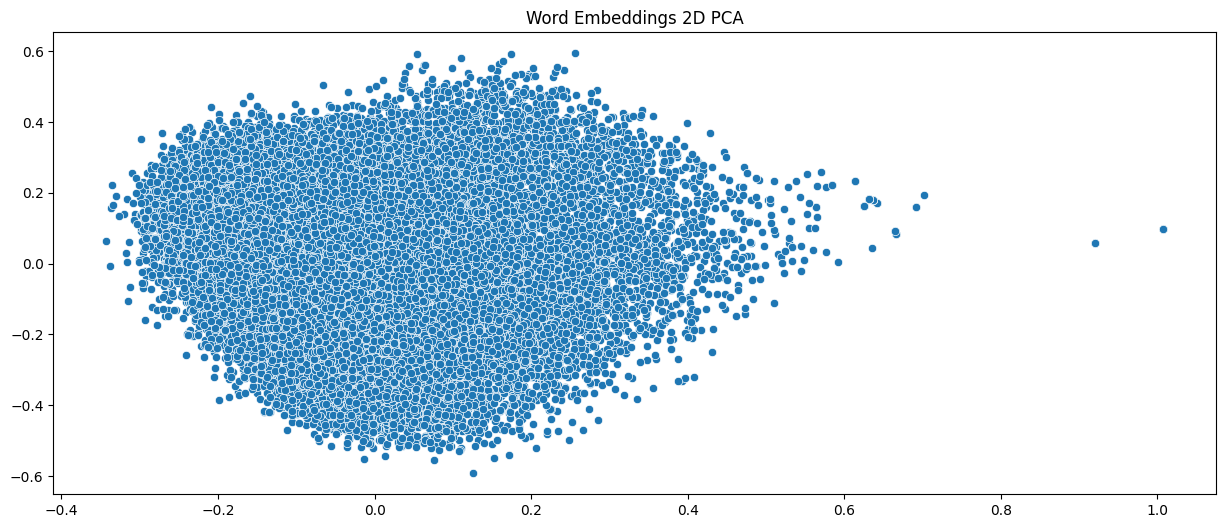

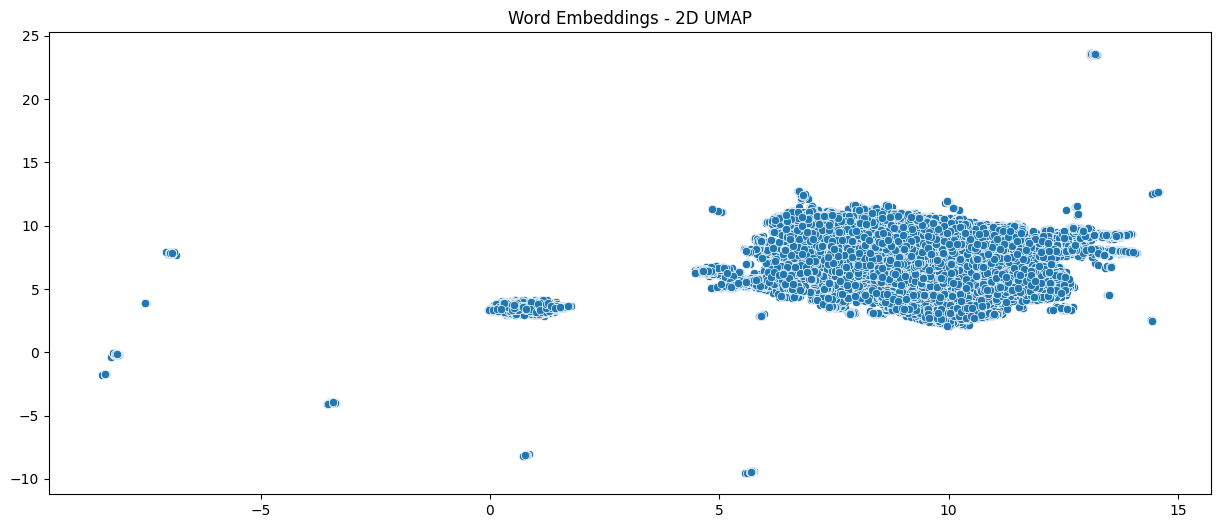

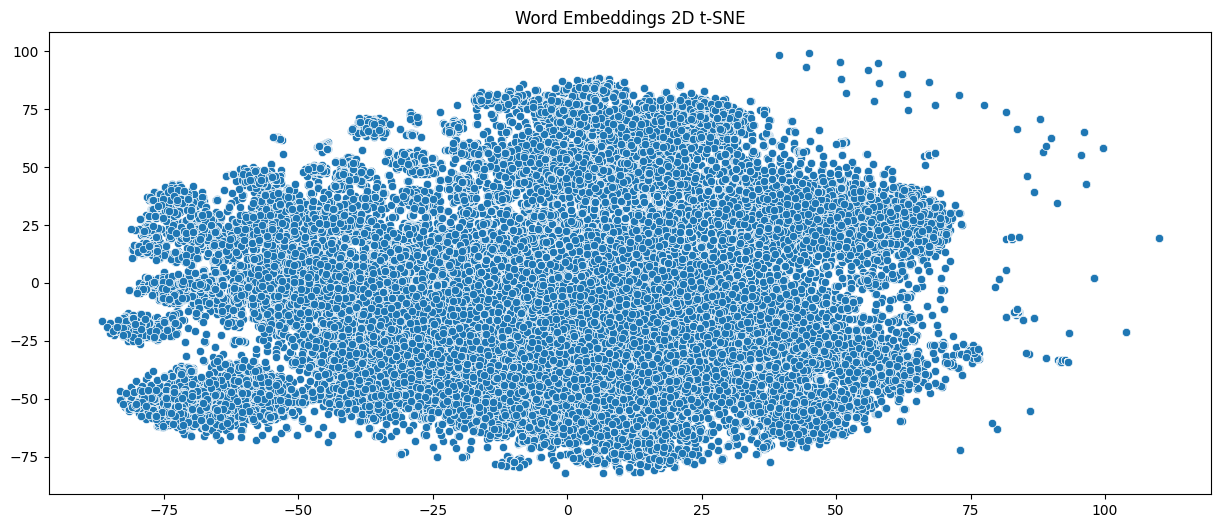

In [23]:
# Visualize the 2D representation
plt.figure(figsize=(15,6))
sns.scatterplot(x=embed_pca[:,0], y=embed_pca[:,1])
plt.title('Word Embeddings 2D PCA')
plt.show()

# Visualizing the 2D representation
plt.figure(figsize=(15,6))
sns.scatterplot(x=embed_umap[:,0], y=embed_umap[:,1])
plt.title('Word Embeddings - 2D UMAP')
plt.show()

plt.figure(figsize=(15,6))
sns.scatterplot(x=embed_tsne[:,0], y=embed_tsne[:,1])
plt.title('Word Embeddings 2D t-SNE')
plt.show()

In [13]:
# Apply PCA with n_components=3
pca1 = PCA(n_components=2)
tf_pca = pca1.fit_transform(tfidf_train)

# Using UMAP to reduce dimensionality
reducer1 = umap.UMAP()
tf_umap = reducer1.fit_transform(tfidf_train)

# T-SNE to reduce dimensionality
tsne1 = TSNE(n_components=2, random_state=0)
tf_tsne = tsne1.fit_transform(tfidf_train)

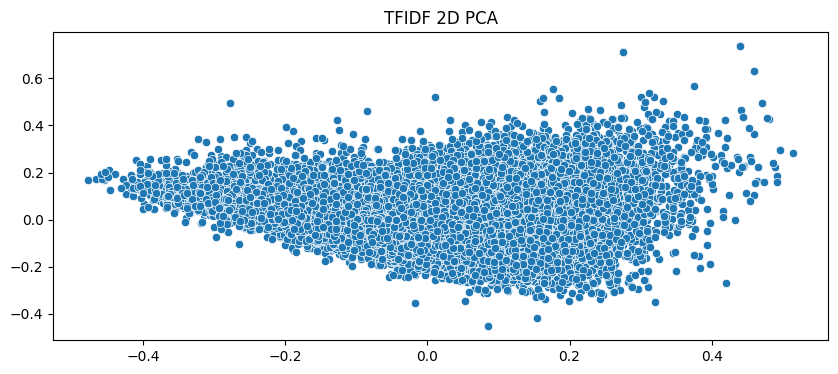

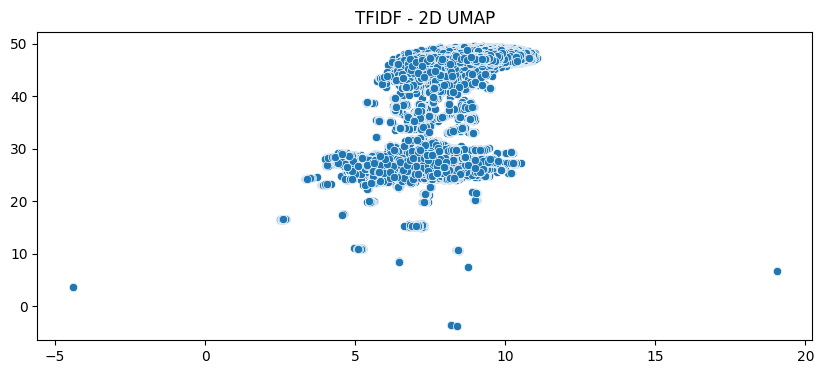

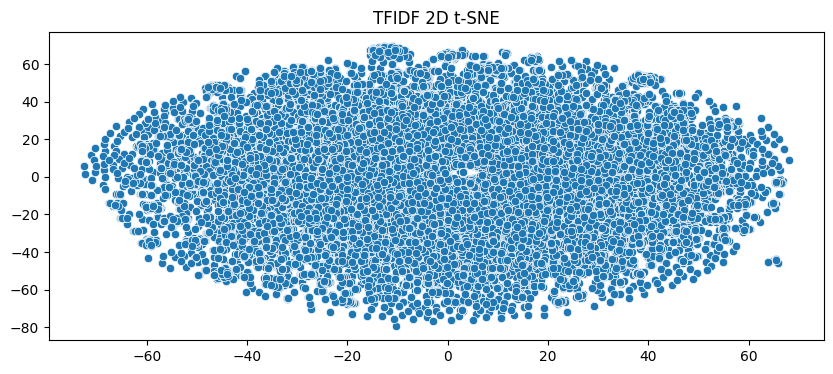

In [17]:
# Visualize the 2D representation
plt.figure(figsize=(10,4))
sns.scatterplot(x=tf_pca[:,0], y=tf_pca[:,1])
plt.title('TFIDF 2D PCA')
plt.show()

# Visualizing the 2D representation
plt.figure(figsize=(10,4))
sns.scatterplot(x=tf_umap[:,0], y=tf_umap[:,1])
plt.title('TFIDF - 2D UMAP')
plt.show()

plt.figure(figsize=(10,4))
sns.scatterplot(x=tf_tsne[:,0], y=tf_tsne[:,1])
plt.title('TFIDF 2D t-SNE')
plt.show()

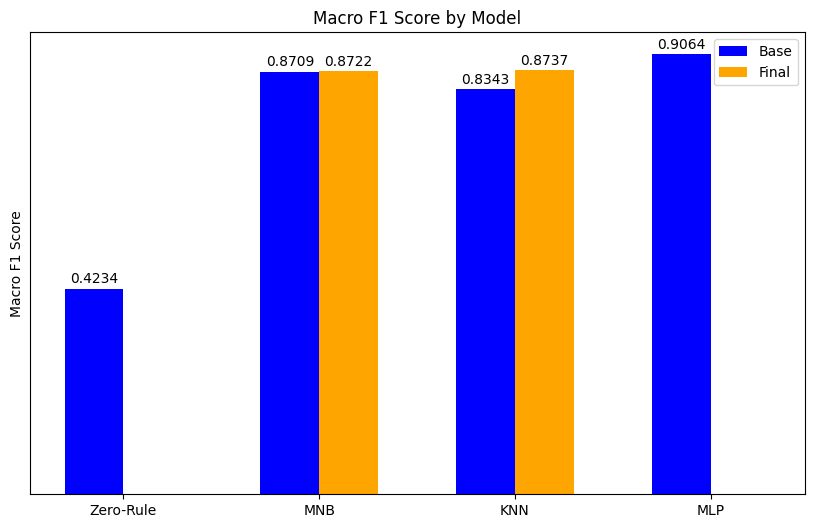

In [44]:
# Grouping data for side-by-side bars
grouped_models = ['Zero-Rule', 'MNB', 'KNN', 'MLP']
base_macro_f1 = [0.4234, 0.8709, 0.8343, 0.9064]
final_macro_f1 = [None, 0.8722, 0.8737, None]

# Replace None with placeholder values (e.g., 0) for plotting
final_macro_f1_placeholder = [x if x is not None else 0 for x in final_macro_f1]

# Create vertical bar chart with grouped bars
fig, ax = plt.subplots(figsize=(10, 6))

# Setting bar width
bar_width = 0.3

# X-axis positions for groups
index = np.arange(len(grouped_models))

# Plotting
bar1 = plt.bar(index - bar_width/2, base_macro_f1, bar_width, label='Base', color='blue')
bar2 = plt.bar(index + bar_width/2, final_macro_f1_placeholder, bar_width, label='Final', color='orange')

# Add labels and title
#plt.xlabel('Model')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score by Model')
plt.xticks(index, grouped_models)

# Remove y-axis ticks
plt.yticks([], [])

# Adding legend
plt.legend()

# Annotate with the actual values
for i, (v_base, v_final) in enumerate(zip(base_macro_f1, final_macro_f1)):
    if v_base is not None:
        plt.text(i - bar_width/2, v_base + 0.005, str(v_base), ha='center', va='bottom', color='black')
    if v_final is not None:
        plt.text(i + bar_width/2, v_final + 0.005, str(v_final), ha='center', va='bottom', color='black')

plt.show()

